In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

colors = [
    "#0A001A",
    "#12003F",
    "#1E1460",
    "#2A227A",
    "#3C2E91",
    "#5B3FAE",
    "#7B4CC4",
    "#A84FD3",
    "#D94FD7",
    "#FF66E5",
    "#4AC3FF",
    "#00AEEF",
    "#007FBE"
]

colors2=[
    "#4AC3FF",
    "#007FBE",
    "#7B4CC4",
    "#A84FD3",
    "#D94FD7",
    ]





In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/ahmedsameh909/Health-Care-Project/main/Data_Heart_clean.csv')

In [ ]:
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#0A001A'
plt.rcParams['axes.facecolor'] = '#12003F' 

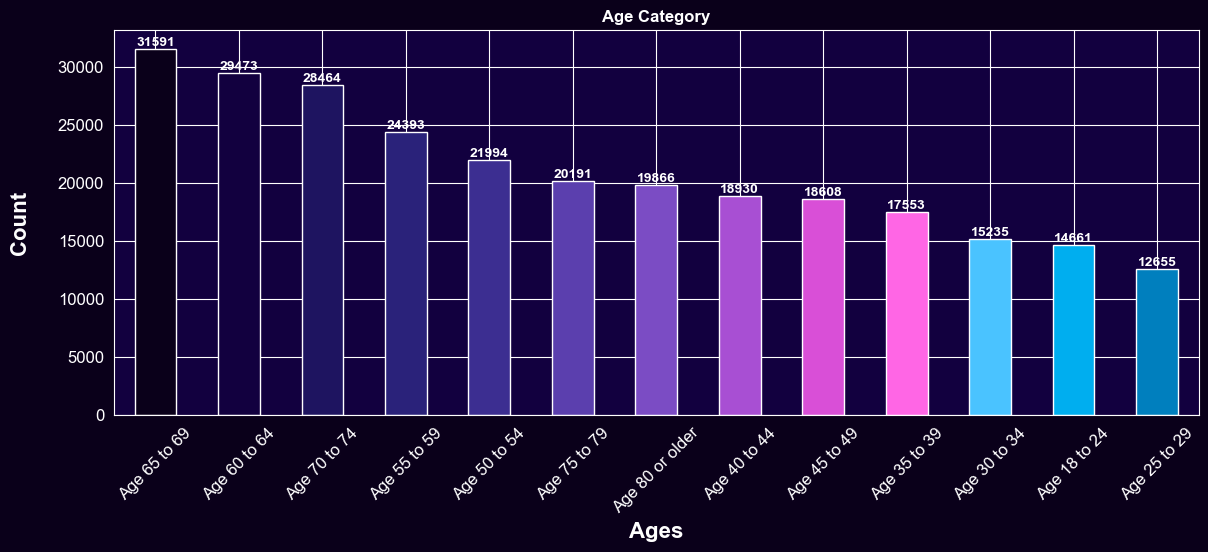

In [35]:
plt.figure(figsize=(14,5))
Age=Data['AgeCategory'].value_counts().plot(kind='bar',color=colors[:len(colors)],rot=45)
for p in Age.patches :
    Age.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha='center' , va='bottom',color='white',weight='bold')
plt.title("Age Category",color='white',weight='bold')
plt.xlabel('Ages',color='white',weight='bold',fontsize=16)
plt.ylabel('Count',color='white',weight='bold',fontsize=16,labelpad = 20)
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()

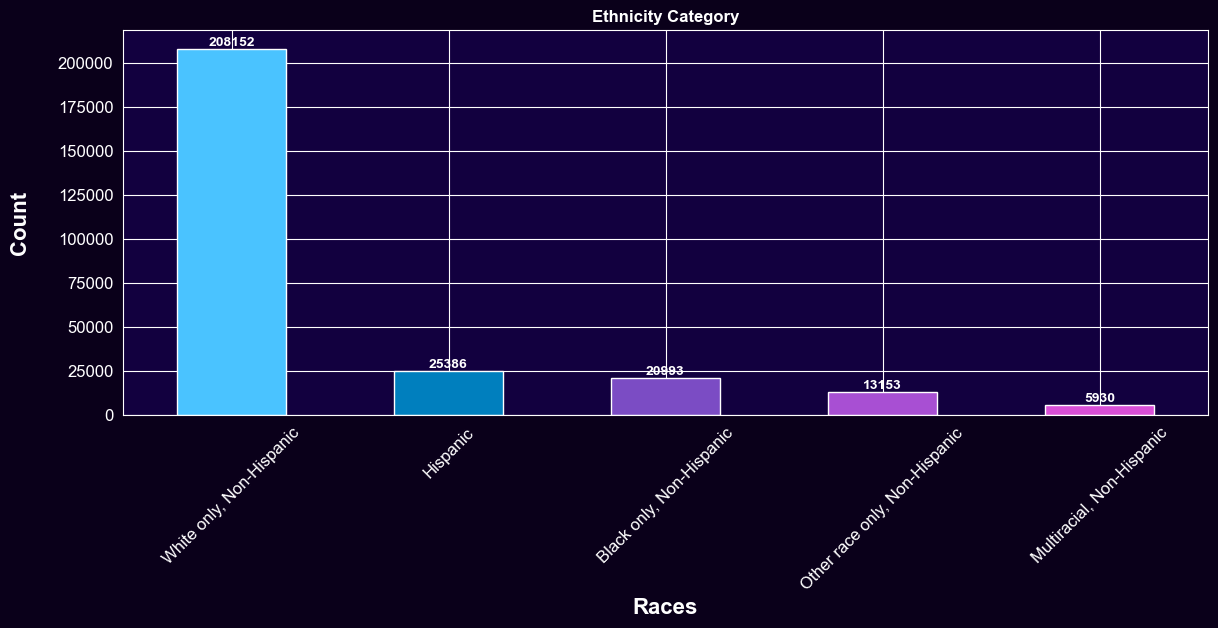

In [88]:
plt.figure(figsize=(14,5))
race=Data['RaceEthnicityCategory'].value_counts().plot(kind='bar',color=colors2[:len(colors2)],rot=45)
for p in race.patches :
    race.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha='center' , va='bottom',color='white',weight='bold')
plt.title("Ethnicity Category",color='white',weight='bold')
plt.xlabel('Races',color='white',weight='bold',fontsize=16)
plt.ylabel('Count',color='white',weight='bold',fontsize=16,labelpad = 20)
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()

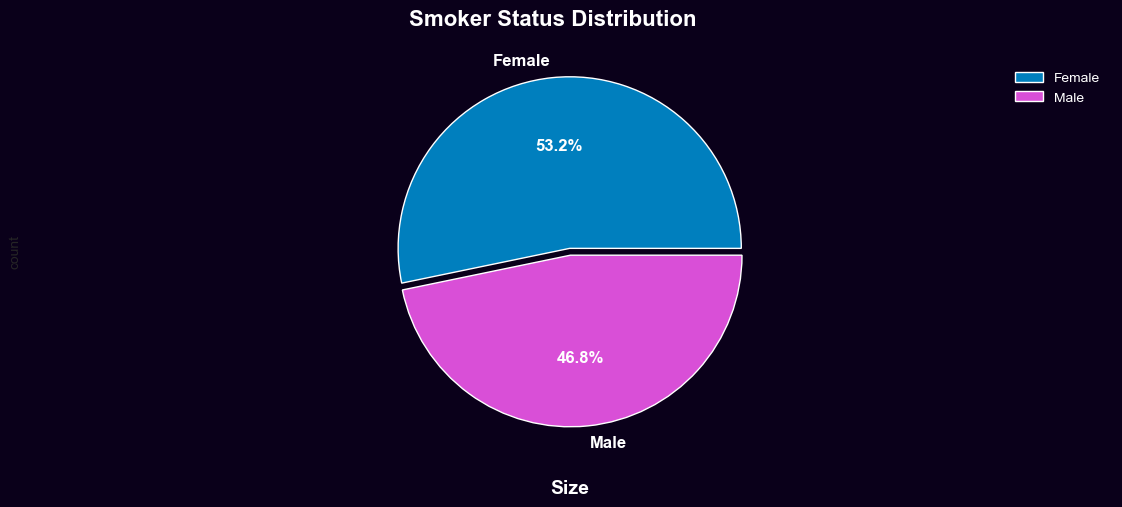

In [80]:
plt.figure(figsize=(14,5))
explode=(0,0.04)
counts=Data['Sex'].value_counts()
counts.plot(kind='pie',autopct='%1.1f%%',explode=explode,colors=["#007FBE","#D94FD7"],textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'})
plt.suptitle("Smoker Status Distribution", fontsize=16, fontweight='bold', color="white")
plt.xlabel('Size', weight = "bold", color = "white", fontsize = 14, labelpad = 25)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best",labelcolor='white',facecolor='#0A001A',edgecolor='#0A001A')
plt.show()

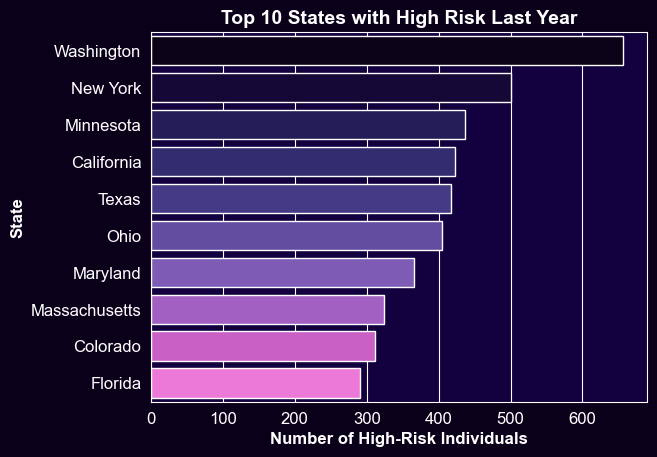

In [50]:
High_Risk_LastYear_State = Data[Data['HighRiskLastYear'] == 1 ]['State']
top_states = High_Risk_LastYear_State.value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette=colors)
plt.title('Top 10 States with High Risk Last Year', fontsize=14, weight='bold',color='white')
plt.xlabel('Number of High-Risk Individuals', fontsize=12,color='white',weight='bold')
plt.ylabel('State', fontsize=12,color='white',weight='bold')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()

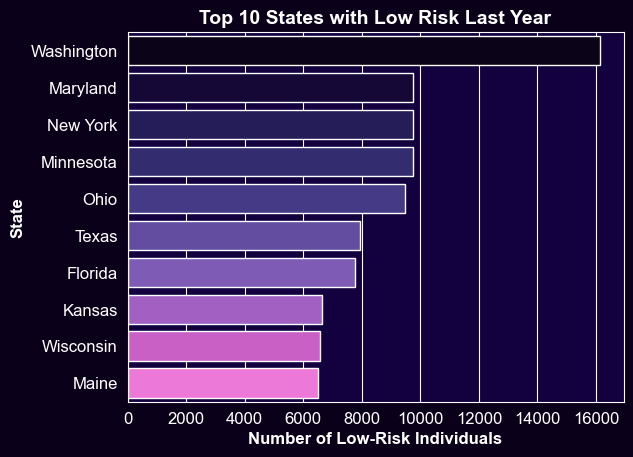

In [54]:
Low_Risk_LastYear_State=Data[Data['HighRiskLastYear'] == 0]['State']
low_states=Low_Risk_LastYear_State.value_counts().head(10)
sns.barplot(x=low_states.values,y=low_states.index,palette=colors)
plt.title('Top 10 States with Low Risk Last Year', fontsize=14, weight='bold',color='white')
plt.xlabel('Number of Low-Risk Individuals', fontsize=12,color='white',weight='bold')
plt.ylabel('State', fontsize=12,color='white',weight='bold')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()

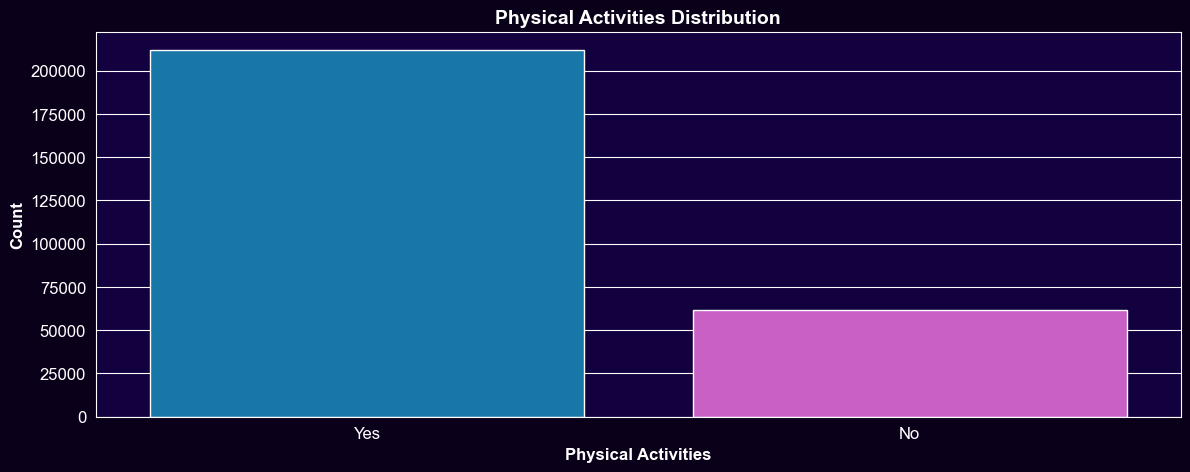

In [68]:
Physical_Activities = Data['PhysicalActivities'].value_counts()
plt.figure(figsize=(14,5))
sns.barplot(x=Physical_Activities.index, y=Physical_Activities.values, palette=["#007FBE","#D94FD7"])
plt.title('Physical Activities Distribution', fontsize=14, weight='bold',color='white')
plt.xlabel('Physical Activities', fontsize=12,color='white',weight='bold')
plt.ylabel('Count', fontsize=12,color='white',weight='bold')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()


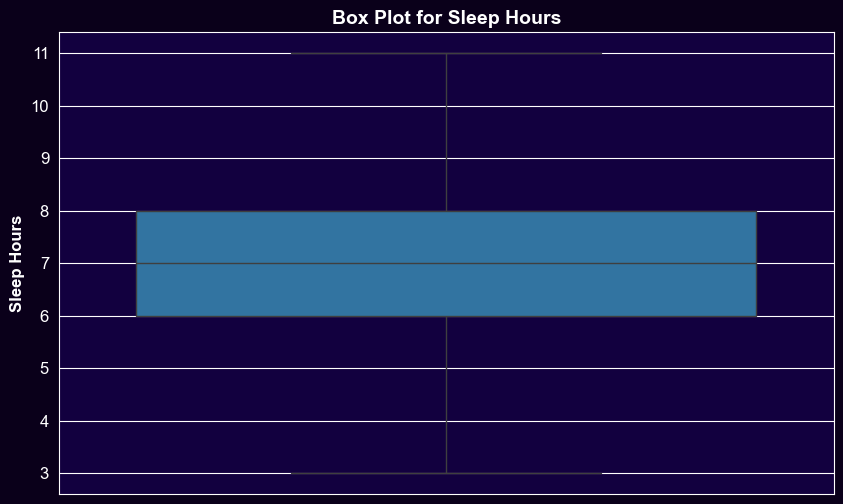

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Data, y='SleepHours')
plt.title('Box Plot for Sleep Hours', fontsize=14, weight='bold',color='white')
plt.ylabel('Sleep Hours', fontsize=12,color='white',weight='bold')
plt.yticks(color='white', fontsize=12)
plt.show()

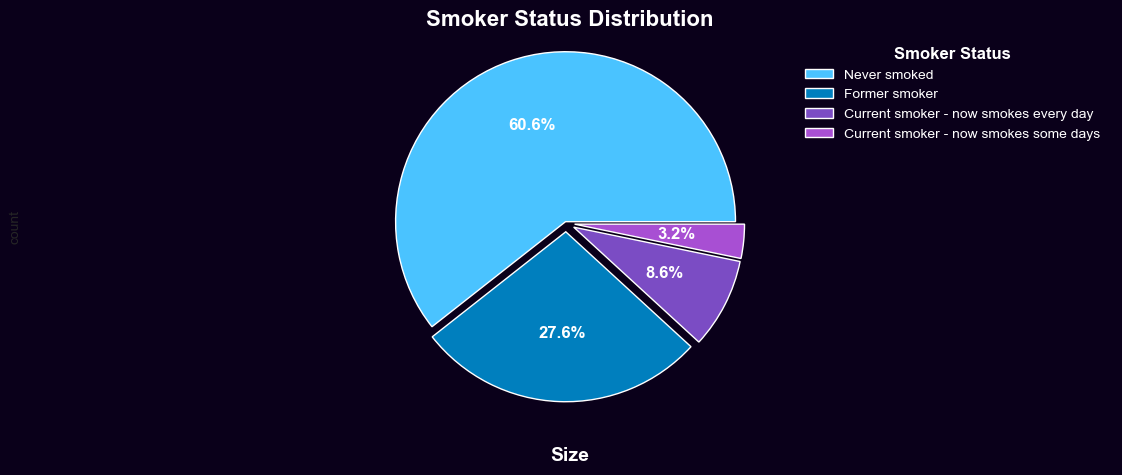

In [89]:
plt.figure(figsize=(14,5))
smoker=Data['SmokerStatus'].value_counts()
explode=(0.01,0.05,0.05,0.05)
smoker.plot(kind='pie',colors=colors2[:len(colors2)],explode=explode,autopct='%1.1f%%',labels=None,textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'})
plt.title("Smoker Status Distribution", fontsize=16, fontweight='bold', color='white')
plt.xlabel('Size', weight = "bold", color = "white", fontsize = 14, labelpad = 20)
legend=plt.legend(labels=smoker.index,title='Smoker Status',title_fontsize='13',labelcolor='white',facecolor='#0A001A',edgecolor='#0A001A')
plt.setp(legend.get_title(), color='white', fontweight='bold', fontsize=12)
plt.axis('equal')
plt.show()

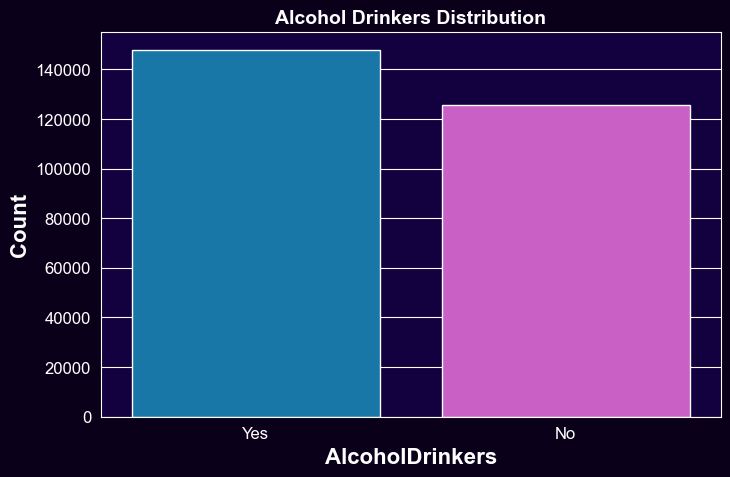

In [91]:
Alcohol = Data['AlcoholDrinkers'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=Alcohol.index, y=Alcohol.values, palette=["#007FBE","#D94FD7"])
plt.title('Alcohol Drinkers Distribution', fontsize=14, fontweight='bold',color='white')
plt.xlabel('AlcoholDrinkers',color='white',weight='bold',fontsize=16)
plt.ylabel('Count',color='white',weight='bold',fontsize=16)
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()

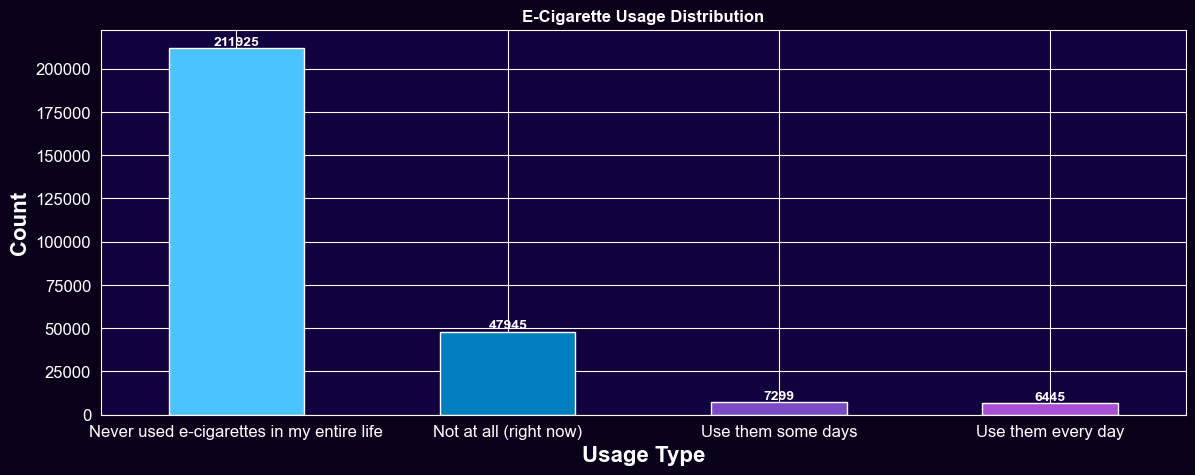

In [94]:
plt.figure(figsize=(14,5))
E_cigarette=Data['ECigaretteUsage'].value_counts().plot(kind='bar',color=colors2[:len(colors2)],rot=0)
for p in E_cigarette.patches:
    E_cigarette.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha ='center', va ='bottom',color='white',weight='bold')
plt.title("E-Cigarette Usage Distribution",color='white',weight='bold')
plt.xlabel('Usage Type',color='white',weight='bold',fontsize=16)
plt.ylabel('Count',color='white',weight='bold',fontsize=16)
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()